In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# imbalace data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,  auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# loading the data
df = pd.read_csv("/content/income_pred.csv")


# EDA

In [24]:
df = df.iloc[1: , :] #delete first row
df.head()

,ID,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
1,1.0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
2,2.0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
3,3.0,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
4,4.0,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
5,5.0,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [25]:
print(f'Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}')

Number of rows: 32561, Number of columns: 16


In [26]:
df.describe()

,ID,age,fnlwgt:,education-num:,capital-gain:,capital-loss:,hours-per-week:
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The above table shows descriptive statistics for numerical variables in our dataset.



##Missing values and

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 1 to 32561
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               32561 non-null  float64
 1   age              32561 non-null  float64
 2   workclass        32561 non-null  object 
 3   fnlwgt:          32561 non-null  float64
 4   education:       32561 non-null  object 
 5   education-num:   32561 non-null  float64
 6   marital-status:  32561 non-null  object 
 7   occupation:      32561 non-null  object 
 8   relationship:    32561 non-null  object 
 9   race:            32561 non-null  object 
 10  sex:             32561 non-null  object 
 11  capital-gain:    32561 non-null  float64
 12  capital-loss:    32561 non-null  float64
 13  hours-per-week:  32561 non-null  float64
 14  native-country:  32561 non-null  object 
 15  class            32561 non-null  object 
dtypes: float64(7), object(9)
memory usage: 4.0+ MB


In [28]:
for c in df.columns:
    print ("count values for "+str(c)+':',len(df[c].value_counts()))


count values for ID: 32561
count values for age: 73
count values for workclass: 9
count values for fnlwgt:: 21648
count values for education:: 16
count values for education-num:: 16
count values for marital-status:: 7
count values for occupation:: 15
count values for relationship:: 6
count values for race:: 5
count values for sex:: 2
count values for capital-gain:: 119
count values for capital-loss:: 92
count values for hours-per-week:: 94
count values for native-country:: 42
count values for class: 2


##Plot of occurences per income

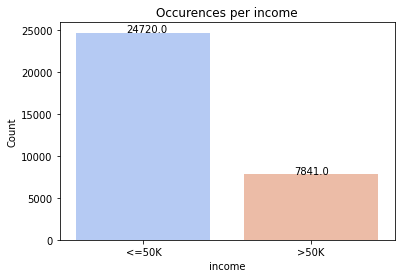

In [29]:
counts = sns.countplot(x='class', data=df, palette='coolwarm')
for p in counts.patches:
        counts.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
counts.set(xlabel='income', ylabel='Count', title='Occurences per income')
plt.show()

In [30]:
def plot_cat_feature_distribution(feature_name,df):
    '''Makes a plotly chart with categorical feature\'s distribution.'''
    feature_0f = df[df['class'] == '<=50K'][feature_name].value_counts()
    feature_1f = df[df['class'] == '>50K'][feature_name].value_counts()
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                        subplot_titles=['<=50K', '>50K'])
    fig.add_trace(go.Pie(labels=feature_0f.index, 
                         values=feature_0f.values), 
                  row=1, col=1)
    fig.add_trace(go.Pie(labels=feature_1f.index, 
                         values=feature_1f.values), 
                  row=1, col=2)
    
    fig.update_layout(title_text=f'The distribution of {feature_name}')
    fig.show()

##visualization of categorical columns

In [31]:
plot_cat_feature_distribution('education:',df)

**people with Bachelores are more likely to earn more than 50K as income compared to people with only a HS-grad who tend to make less than 50K**

In [32]:
plot_cat_feature_distribution('workclass',df)

**There are no significant differences**

In [33]:
plot_cat_feature_distribution('marital-status:',df)

In [34]:
plot_cat_feature_distribution('relationship:',df)

**Married people are more likely to earn more than 50K as income**

In [35]:
plot_cat_feature_distribution('occupation:',df)


**There are prominent professions for people who earn more than 50K as income**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Race')

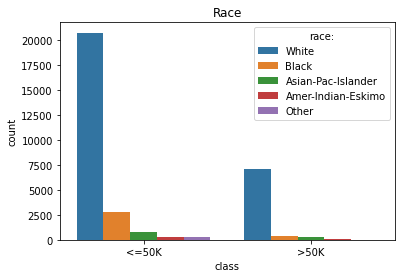

In [36]:
ax = sns.countplot(df['class'], hue=df['race:'])
ax.set_title('Race')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Sex')

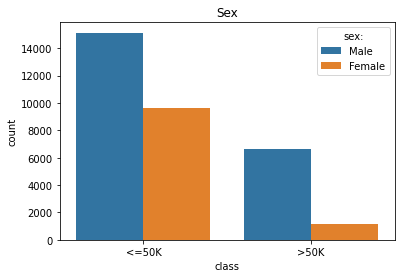

In [37]:
ax = sns.countplot(df['class'], hue=df['sex:'])
ax.set_title('Sex')

**Because there are more "<=50K" then it seems that there are no differences**

Text(0, 0.5, 'Counts')

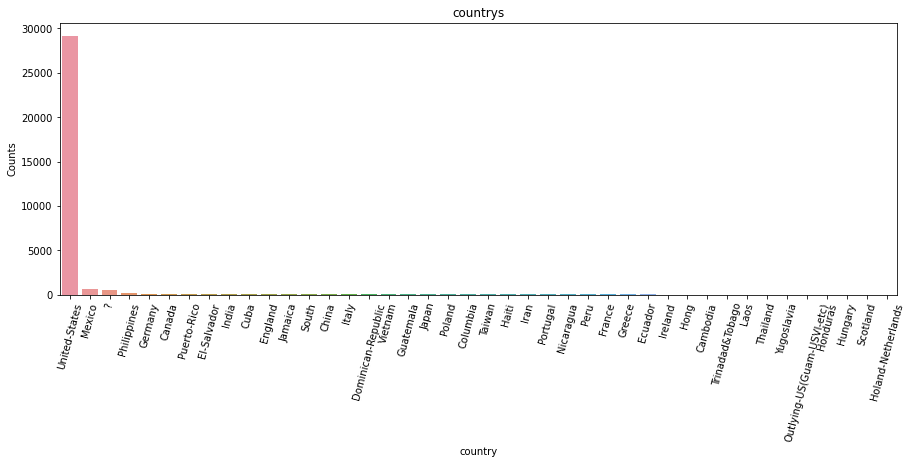

In [38]:
plt.figure(figsize=(15, 5))
highest_sport = df['native-country:'].value_counts().index
sns.countplot(data=df, x='native-country:', order=highest_sport)
plt.xticks(rotation=75)
plt.title('countrys')
plt.xlabel('country')
plt.ylabel('Counts')

##visualization of numerical columns

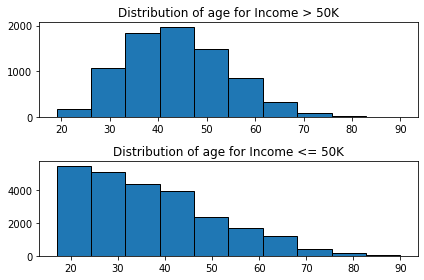

In [39]:
feature = 'age'

age50k = df[df['class']=='>50K'][feature]
agel50k = df[df['class']=='<=50K'][feature]
fig, axs = plt.subplots(2, 1)
axs[0].hist(age50k, edgecolor='black')
axs[0].set_title(f'Distribution of {feature} for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title(f'Distribution of {feature} for Income <= 50K')
plt.tight_layout()


Text(0.5, 1.0, 'Box plot representing age and income \n')

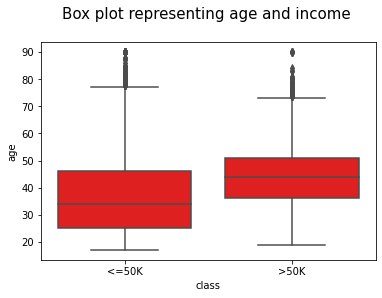

In [40]:
#Variation between age and income level
sns.boxplot(x=df['class'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

For Income > 50K, Age is almost **normally** distributed

For Income <=50K, Age is positively skewed. More people in the **20s and 30s** have income <= 50K.

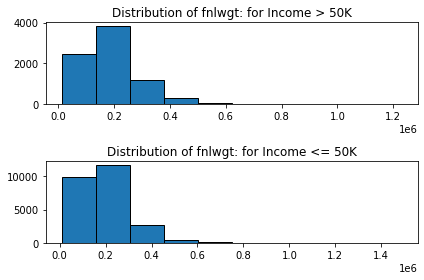

In [41]:
feature = 'fnlwgt:'

age50k = df[df['class']=='>50K'][feature]
agel50k = df[df['class']=='<=50K'][feature]
fig, axs = plt.subplots(2, 1)
axs[0].hist(age50k, edgecolor='black')
axs[0].set_title(f'Distribution of {feature} for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title(f'Distribution of {feature} for Income <= 50K')
plt.tight_layout()


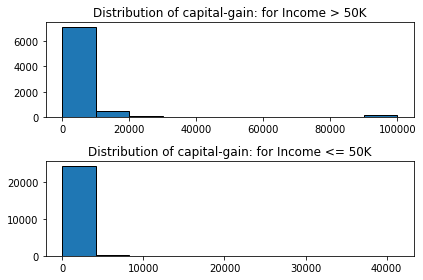

In [42]:
feature = 'capital-gain:'

age50k = df[df['class']=='>50K'][feature]
agel50k = df[df['class']=='<=50K'][feature]
fig, axs = plt.subplots(2, 1)
axs[0].hist(age50k, edgecolor='black')
axs[0].set_title(f'Distribution of {feature} for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title(f'Distribution of {feature} for Income <= 50K')
plt.tight_layout()

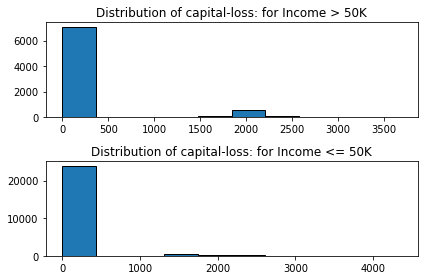

In [43]:
feature = 'capital-loss:'

age50k = df[df['class']=='>50K'][feature]
agel50k = df[df['class']=='<=50K'][feature]
fig, axs = plt.subplots(2, 1)
axs[0].hist(age50k, edgecolor='black')
axs[0].set_title(f'Distribution of {feature} for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title(f'Distribution of {feature} for Income <= 50K')
plt.tight_layout()

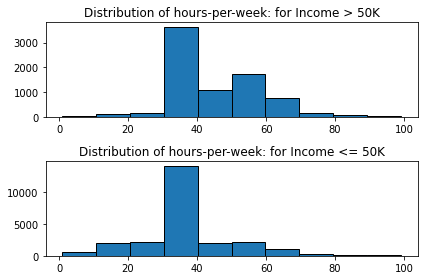

In [44]:
feature = 'hours-per-week:'

age50k = df[df['class']=='>50K'][feature]
agel50k = df[df['class']=='<=50K'][feature]
fig, axs = plt.subplots(2, 1)
axs[0].hist(age50k, edgecolor='black')
axs[0].set_title(f'Distribution of {feature} for Income > 50K')

axs[1].hist(agel50k, edgecolor='black')
axs[1].set_title(f'Distribution of {feature} for Income <= 50K')
plt.tight_layout()

people who earn more than 50K as income work more hours compared to people who earn less than 50K

#Data preparation

In [45]:
# drop the duplicate values
df.drop_duplicates(inplace=True)
# Check for duplicate
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


In [46]:
df = df.replace('?', np.NaN)
df = df.dropna()


In [47]:
df['country'] = df['native-country:'].apply(lambda c : 1 if c == 'United-States' else 0 )
df['class'] = df['class'].map({'<=50K':0, '>50K':1})

In [48]:
# Drop columns
df.drop(['education:','ID','native-country:'], axis = 1, inplace = True)

Transform Category/Text Data

In [49]:
# Move the target to the last columns
target = df['class']
df.drop('class', axis = 1, inplace = True)
df['class'] = target


labelencoder = LabelEncoder()
for col in ['workclass', 'marital-status:','occupation:','relationship:','race:','sex:']:
  df[col] = labelencoder.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,country,class
1,39.0,5,77516.0,13.0,4,0,1,4,1,2174.0,0.0,40.0,1,0
2,50.0,4,83311.0,13.0,2,3,0,4,1,0.0,0.0,13.0,1,0
3,38.0,2,215646.0,9.0,0,5,1,4,1,0.0,0.0,40.0,1,0
4,53.0,2,234721.0,7.0,2,5,0,2,1,0.0,0.0,40.0,1,0
5,28.0,2,338409.0,13.0,2,9,5,2,0,0.0,0.0,40.0,0,0


In [50]:
print(f'Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}')

Number of rows: 30162, Number of columns: 14


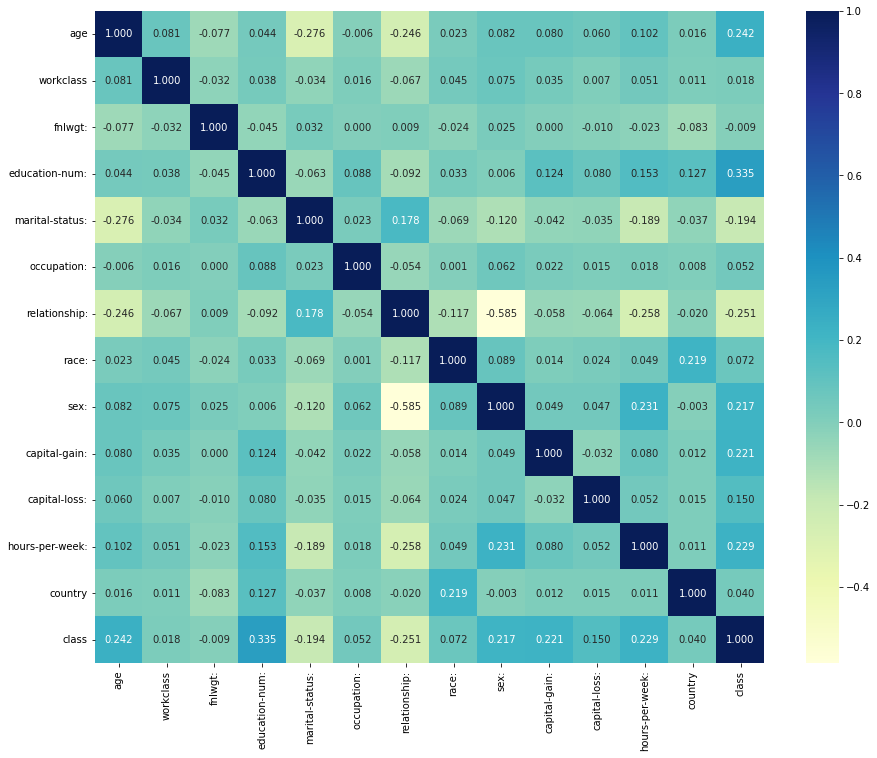

In [51]:
plt.figure(figsize=(15,12))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f', cmap='YlGnBu')

#Modeling and Evaluation

In [106]:
X= df.drop(['class'],axis=1)
y=df['class']


split_size=0.25

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)



In [107]:
oversample = SMOTE()#sampling_strategy=0.65
X_over, y_over = oversample.fit_resample(X_train, y_train)
df_oversampler = pd.DataFrame(X_over, columns =X.columns)
df_oversampler['class'] = y_over

In [108]:
X_over.drop(['class'], axis = 1, inplace = True)

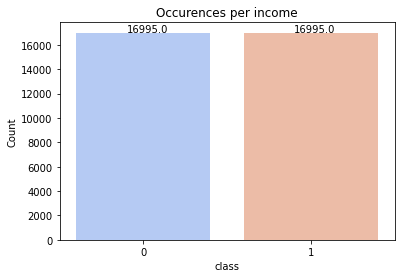

In [109]:
counts = sns.countplot(x='class', data=df_oversampler, palette='coolwarm')
for p in counts.patches:
        counts.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
counts.set(xlabel='class', ylabel='Count', title='Occurences per income')
plt.show()


1.   Random Forest
2.   Logistic regression
3.   KNN







In [97]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return  sensitivity, specificity

##Random Forest

In [125]:
#Training the model - Random Forest
rfc=RandomForestClassifier(max_depth=8, n_estimators=800, random_state=42)
rfc.fit(X_over, y_over)

RandomForestClassifier(max_depth=8, n_estimators=800, random_state=42)

In [126]:

print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_over, y_over)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 0.88
Accuracy of Random Forest Classifier on test set: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5659
           1       0.62      0.74      0.68      1882

    accuracy                           0.82      7541
   macro avg       0.77      0.80      0.78      7541
weighted avg       0.84      0.82      0.83      7541



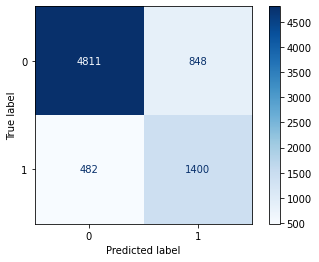

In [127]:
pred = rfc.predict(X_test)
plot_confusion_matrix(rfc,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, pred))

In [128]:
sensitivity, specificity = get_performances( y_test,pred)
print(f'sensitivity: {sensitivity},specificity: {specificity}')

sensitivity: 0.8501502032161159,specificity: 0.7438894792773645


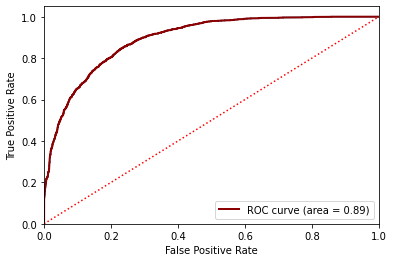

In [137]:
#define metrics
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
lw=2
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

val = np.linspace(0, 1, 10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(val, val, ':r');
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Logistic regression

Feature Selection - Logistic regression

In [138]:
bestfeatures = SelectKBest(score_func=f_classif, k=11)
fit = bestfeatures.fit(X_over, y_over) # 

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_over.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Feature','Score']  # naming the dataframe columns

features = featureScores.nlargest(11,'Score')['Feature']

X_train_smote_new = X_over[features]
X_train_smote_new.head()

,education-num:,relationship:,age,marital-status:,hours-per-week:,capital-gain:,sex:,capital-loss:,workclass,race:,occupation:
0,10.0,3,22.0,4,35.0,0.0,1,0.0,2,4,5
1,10.0,1,24.0,0,40.0,0.0,0,0.0,2,4,0
2,9.0,4,57.0,0,62.0,0.0,0,0.0,1,4,0
3,2.0,0,53.0,2,32.0,0.0,1,0.0,1,4,7
4,10.0,3,20.0,4,10.0,0.0,1,0.0,2,4,4


In [139]:
LR = LogisticRegression()
LR.fit(X_train_smote_new, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [140]:
X_test_new = X_test[features]
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(LR.score(X_train_smote_new, y_over)))
print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(LR.score(X_test_new, y_test)))

Accuracy of Logistic Regression on training set: 0.77
Accuracy of Logistic Regression on test set: 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



              precision    recall  f1-score   support

           0       0.89      0.72      0.80      5659
           1       0.47      0.74      0.58      1882

    accuracy                           0.73      7541
   macro avg       0.68      0.73      0.69      7541
weighted avg       0.79      0.73      0.74      7541



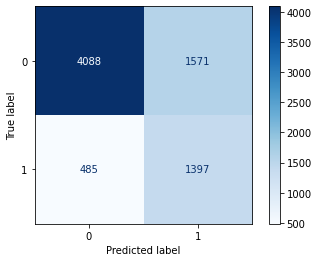

In [141]:
pred = LR.predict(X_test_new)
plot_confusion_matrix(LR,X_test_new,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, pred))

In [142]:
sensitivity, specificity = get_performances( y_test,pred)
print(f'sensitivity: {sensitivity},specificity: {specificity}')

sensitivity: 0.7223891146845732,specificity: 0.7422954303931987


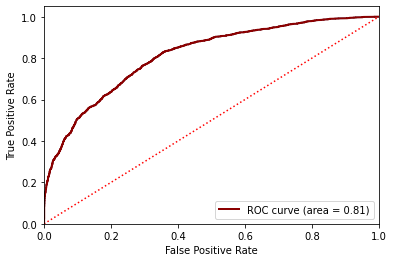

In [143]:
#define metrics
y_pred_proba = LR.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
lw=2
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

val = np.linspace(0, 1, 10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(val, val, ':r');
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

##KNN

In [144]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train_smote_new, y_over)

KNeighborsClassifier(n_neighbors=20)

In [145]:
X_test_new = X_test[features]
print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train_smote_new, y_over)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test_new, y_test)))

Accuracy of KNN on training set: 0.85
Accuracy of KNN on test set: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5659
           1       0.58      0.78      0.66      1882

    accuracy                           0.80      7541
   macro avg       0.75      0.79      0.76      7541
weighted avg       0.83      0.80      0.81      7541



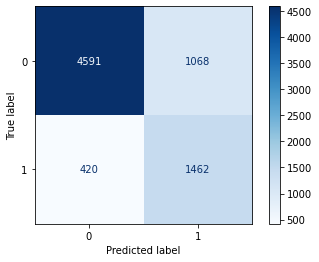

In [146]:
pred = knn.predict(X_test_new)
plot_confusion_matrix(knn,X_test_new,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, pred))

In [147]:
sensitivity, specificity = get_performances( y_test,pred)
print(f'sensitivity: {sensitivity},specificity: {specificity}')

sensitivity: 0.811274076691995,specificity: 0.7768331562167906


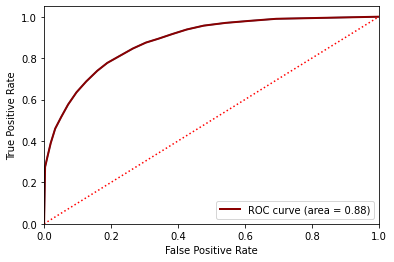

In [148]:
#define metrics
y_pred_proba = knn.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
lw=2
plt.plot(fpr,tpr)
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

val = np.linspace(0, 1, 10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(val, val, ':r');
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

feature_importances - RF

In [155]:
ft_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

marital-status:    0.263815
education-num:     0.220872
relationship:      0.168669
age                0.104824
hours-per-week:    0.097920
capital-gain:      0.082835
occupation:        0.019888
capital-loss:      0.013419
workclass          0.012049
sex:               0.009706
fnlwgt:            0.004339
race:              0.001154
country            0.000507
dtype: float64

#Conclusions




* There are significant differences in education, occupation and marital status between people who earn over 50K compared to people who income less 50K
* For RD has high accuracy and sensitivity, and knn has high specificity.   
* The best model for task is RF With Accuracy of **82**%
*   The area under the ROC curve is 0.89, it able to provide output 89% of the times.
* marital-status, education-num,relationship and age has major significance in model.



